In [31]:
%matplotlib inline
import netCDF4 
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

Location: Golfo de Penas (chilean Patagonia).

Geo-cordinates (image subset):
- NLb = -44.531
- WLb = -75.854
- SLb = -47.584
- ELb = -74.462

**DATE: 2022/02/22**

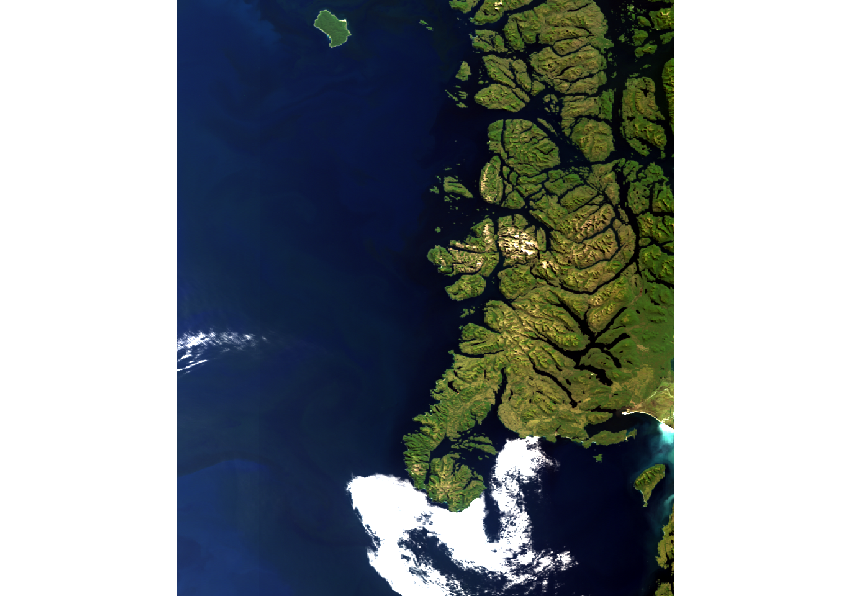

In [32]:
# Xarray dataset from SNAP (Sentinel Application Plataform) C2RCC Processor
file = 'subset120220222T135827_C2RCC.nc'
ds = xr.open_dataset(file)
print('data size:',ds.nbytes/1e6, 'MB')
ds

data size: 138.24 MB


<xarray.Dataset>
Dimensions:                                            (y: 960, x: 800)
Coordinates:
    lat                                                (y, x) float64 ...
    lon                                                (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables: (12/41)
    conc_tsm                                           (y, x) float32 ...
    conc_chl                                           (y, x) float32 ...
    unc_tsm                                            (y, x) float32 ...
    unc_chl                                            (y, x) float32 ...
    TP_latitude                                        (y, x) float32 ...
    TP_longitude                                       (y, x) float32 ...
    ...                                                 ...
    horizontal_wind_vector_1                           (y, x) float32 ...
    horizontal_wind_vector_2                           (y, x) float32 ...
    humidity                                           (y, x) float32 ...
    sea_level_pressure                                 (y, x) float32 ...
    total_columnar_water_vapour                        (y, x) float32 ...
    total_ozone                                        (y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     320:400
    start_date:   22-FEB-2022 13:58:57.881828
    stop_date:    22-FEB-2022 13:59:40.087207

In [33]:
# Checking all variables
nc = netCDF4.Dataset(file, mode='r')
nc.variables.keys()

dict_keys(['conc_tsm', 'conc_chl', 'unc_tsm', 'unc_chl', 'TP_latitude', 'TP_longitude', 'OAA', 'OZA', 'SAA', 'SZA', 'atmospheric_temperature_profile_pressure_level_1', 'atmospheric_temperature_profile_pressure_level_2', 'atmospheric_temperature_profile_pressure_level_3', 'atmospheric_temperature_profile_pressure_level_4', 'atmospheric_temperature_profile_pressure_level_5', 'atmospheric_temperature_profile_pressure_level_6', 'atmospheric_temperature_profile_pressure_level_7', 'atmospheric_temperature_profile_pressure_level_8', 'atmospheric_temperature_profile_pressure_level_9', 'atmospheric_temperature_profile_pressure_level_10', 'atmospheric_temperature_profile_pressure_level_11', 'atmospheric_temperature_profile_pressure_level_12', 'atmospheric_temperature_profile_pressure_level_13', 'atmospheric_temperature_profile_pressure_level_14', 'atmospheric_temperature_profile_pressure_level_15', 'atmospheric_temperature_profile_pressure_level_16', 'atmospheric_temperature_profile_pressure_lev

In [34]:
# Variables of interest
con_chl = nc.variables['conc_chl']
con_tsm = nc.variables['conc_tsm']

In [35]:
chl = np.array(con_chl)
tsm = np.array(con_tsm)

In [36]:
# DataFrame with chl and tsm values 
df = pd.DataFrame(data={'chl' : chl.flatten(), 'tsm' : tsm.flatten()})

In [37]:
df.describe()

,chl,tsm
count,768000.000000,768000.000000
mean,3.516783,4.428248
std,10.167714,18.443274
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.111695,0.652198
75%,1.757622,1.223537
max,95.643234,319.922638


In [38]:
# uncertainty or error of chl and tsm values
u_chl = nc.variables['unc_chl']
u_tsm = nc.variables['unc_tsm']

In [39]:
chl_unc = np.array(u_chl)
tsm_unc = np.array(u_tsm)

In [40]:
# Dataframe
df_u = pd.DataFrame(data={'chl_unc' : chl_unc.flatten(), 'tsm_unc' : tsm_unc.flatten()})

In [12]:
df_u.describe()

,chl_unc,tsm_unc
count,768000.000000,768000.000000
mean,0.305699,0.541277
std,0.865176,2.609414
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.109590,0.060500
75%,0.168752,0.118368
max,36.941750,97.726036


### Chlorophyll a

(array([[945.,   1.,   0., ...,   2.,   0.,   0.],
        [945.,   0.,   0., ...,   2.,   0.,   0.],
        [941.,   1.,   1., ...,   2.,   1.,   0.],
        ...,
        [959.,   1.,   0., ...,   0.,   0.,   0.],
        [960.,   0.,   0., ...,   0.,   0.,   0.],
        [959.,   1.,   0., ...,   0.,   0.,   0.]]),
 array([ 0.      ,  9.564323, 19.128647, 28.69297 , 38.257294, 47.821617,
        57.38594 , 66.950264, 76.51459 , 86.07891 , 95.643234],
       dtype=float32),
 <a list of 800 BarContainer objects>)

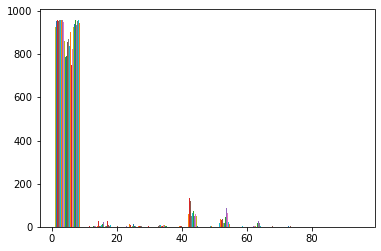

In [13]:
# quick view of values distribution
plt.hist(chl)

In [14]:
# chl concentration under 5 mg m-3
chl_values = df.chl[df["chl"]<=5.00]

In [15]:
chl_values.describe()

count    714287.000000
mean          1.070286
std           0.951752
min           0.000000
25%           0.000000
50%           1.028570
75%           1.624201
max           4.998534
Name: chl, dtype: float64

In [16]:
# chl concentration over 5 mg m-3
chl_high_values = df.chl[df["chl"]>=5.00]

In [17]:
chl_high_values.describe()

count    53713.000000
mean        36.051113
std         18.107733
min          5.000741
25%         14.832670
50%         42.719543
75%         48.251072
max         95.643234
Name: chl, dtype: float64

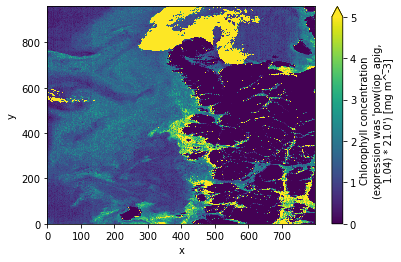

In [18]:
# Chlorophyll a map with matplotlib
ds.conc_chl.plot(vmin = 0, vmax = 5)

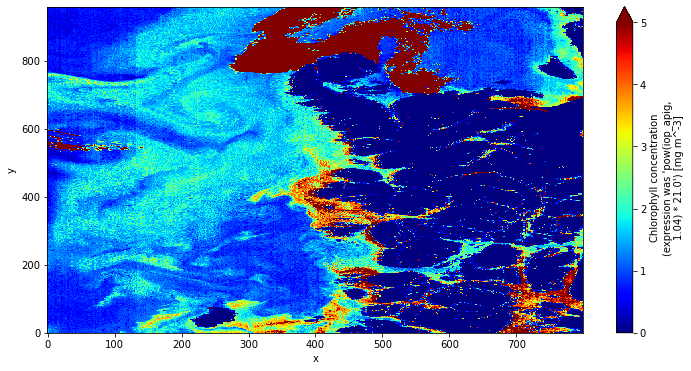

In [19]:
# another map
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_chl.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP chlorophyll a concentration with cloud risk mask

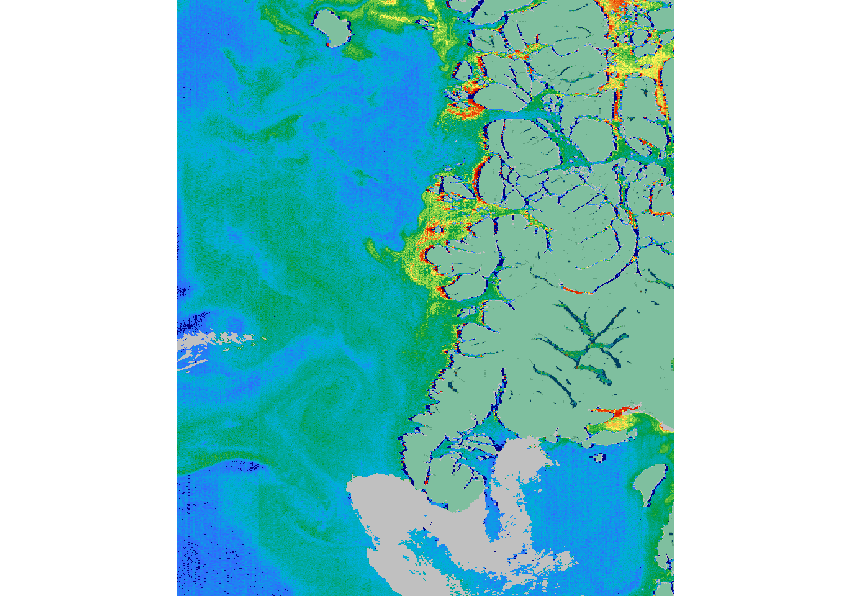

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


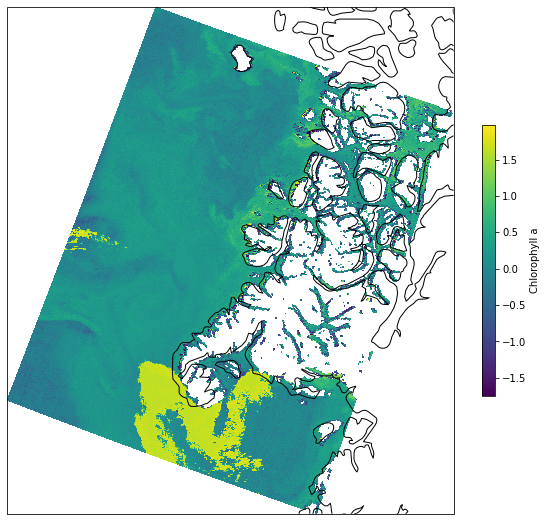

In [20]:
#Log10 scale of chlorophyll a map

import rasterio
import cartopy.crs as ccrs
proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()

plt.figure( figsize=(10,10))
ax = plt.axes(projection=proj)


# defining the variables to plot
## log transformation
conc_chl = np.log10(ds.conc_chl)
lat = ds.lat
lon = ds.lon

plt.pcolor(lon, lat, conc_chl, transform = data_crs)

plt.colorbar(label = 'Chlorophyll a', shrink=0.5)

ax.coastlines('10m')

plt.show()

### TSM (Total Suspended Matter)

(array([[951.,   4.,   1., ...,   0.,   0.,   0.],
        [949.,   1.,   4., ...,   0.,   0.,   0.],
        [948.,   5.,   4., ...,   0.,   0.,   0.],
        ...,
        [946.,   6.,   1., ...,   3.,   0.,   0.],
        [949.,   4.,   2., ...,   3.,   0.,   0.],
        [952.,   3.,   0., ...,   0.,   0.,   0.]]),
 array([  0.      ,  31.992264,  63.984528,  95.97679 , 127.969055,
        159.96132 , 191.95358 , 223.94585 , 255.93811 , 287.93036 ,
        319.92264 ], dtype=float32),
 <a list of 800 BarContainer objects>)

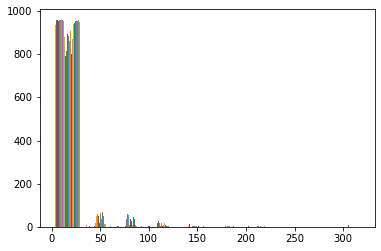

In [21]:
# quick view of values distribution
plt.hist(tsm)

In [22]:
# tsm concentration under 20 g m-3
tsm_values = df.tsm[df["tsm"]<=20.00]

In [23]:
tsm_values.describe()

count    729986.000000
mean          0.777499
std           1.220241
min           0.000000
25%           0.000000
50%           0.609476
75%           1.127504
max          19.996349
Name: tsm, dtype: float64

In [24]:
# tsm concentration over 20 g m-3
tsm_high_values = df.tsm[df["tsm"]>=20.00]

In [25]:
tsm_high_values.describe()

count    38014.000000
mean        74.536697
std         40.892033
min         20.002020
25%         48.447400
50%         65.694588
75%         88.842255
max        319.922638
Name: tsm, dtype: float64

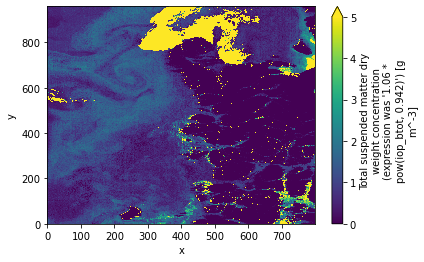

In [41]:
# TSM map with matplotlib
ds.conc_tsm.plot(vmin = 0, vmax = 5.00)

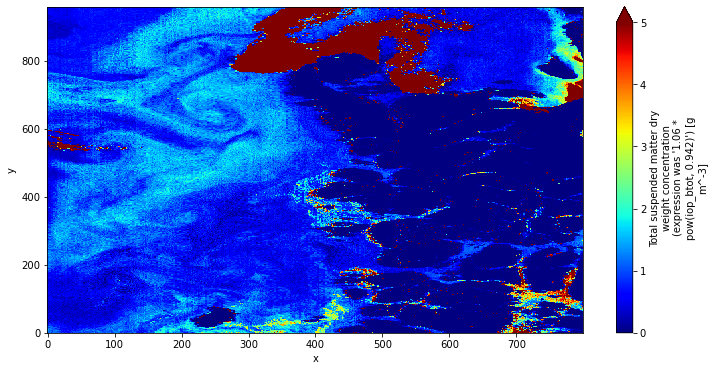

In [42]:
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_tsm.plot(vmin=0, vmax=5.00, cmap='jet',ax=ax)

#### SNAP picture TSM concentration

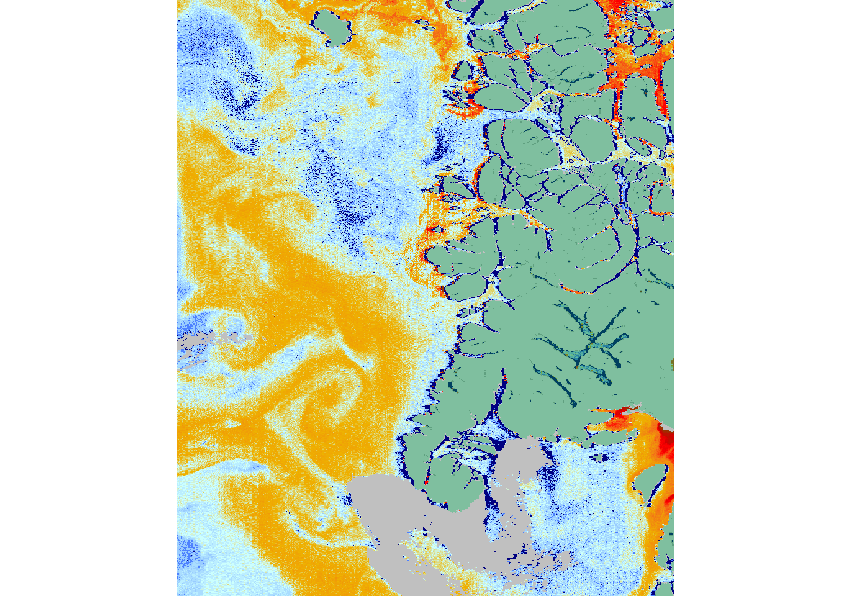